In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io  # used to load matlab file
from scipy import linalg  # used for SVD function
from sklearn import preprocessing  # used for feature scaling

## Principal Component Analysis

#### Dataset Visualization

In [2]:
data = io.loadmat('ex7/ex7data1.mat')

In [3]:
type(data)

dict

In [4]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [5]:
X = data['X']
X[:5]

array([[ 3.38156267,  3.38911268],
       [ 4.52787538,  5.8541781 ],
       [ 2.65568187,  4.41199472],
       [ 2.76523467,  3.71541365],
       [ 2.84656011,  4.17550645]])

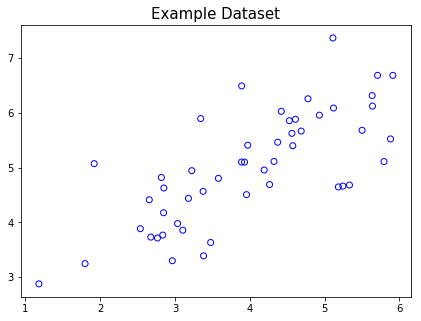

In [6]:
plt.figure(figsize=(7, 5), facecolor='w')
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.title('Example Dataset', fontsize=15)

### Principal Component Analysis (PCA) algorithm
##### 1. Feature scaling: mean normalization (ensure every feature has zero mean)
##### 2. Compute the covariance matrix of the data, which is given by:
$$Sigma = \dfrac {1}{m}\sum ^{n}_{i=1}\left( x^{(i)}\right) \left( x^{\left( i\right) }\right) ^{T}$$
##### 3. Use SVD (Singular Value Decomposition) to compute eigenvectors U and eigenvalues S of Sigma matrix:
$$[U, S, V] = svd(Sigma)$$

#### Implementing PCA

In [7]:
def featureScaling(X):
    """
    Use sklearn MinMaxScaler function for feature scaling (zero mean, unit variance scaling).
    """
    scaler = preprocessing.StandardScaler()
    X_mu = scaler.fit(X).mean_
    X_std = np.sqrt(scaler.fit(X).var_)
    X_scaling = scaler.fit_transform(X)
    return (X_scaling, X_mu, X_std)

In [8]:
def getUSV(X_norm):
    """
    1. Compute the covariance matrix, note that Sigma is a n×n matrix
    2. Compute eigenvectors by scipy svd function.
    """
    cov_matrix = np.dot(X_norm.T, X_norm) / (X_norm.shape[0])  # covariance matrix is (2*2)
    U, S, V = linalg.svd(cov_matrix, full_matrices=True, compute_uv=True)  # SVD
    return (U, S, V)

In [9]:
# feature scaling
X_norm, X_mu, X_std = featureScaling(X)

# SVD
U, S, V = getUSV(X_norm)

In [10]:
# The top principal component (eigenvector) is about [-0.707 -0.707].
print('The top principal component is {}'.format(U[0]))

The top principal component is [-0.70710678 -0.70710678]


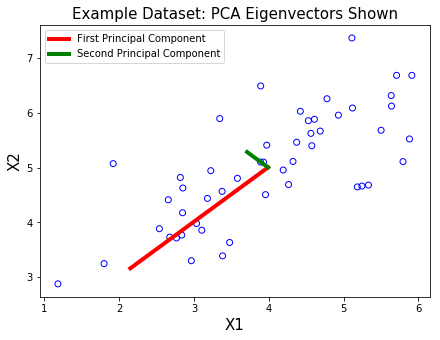

In [11]:
# Draw the eigenvectors centered at mean of data.
# These lines show the directions of maximum variations in the dataset.

plt.figure(figsize=(7, 5), facecolor='w')
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.title('Example Dataset: PCA Eigenvectors Shown', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)

# first principal component
plt.plot([X_mu[0], (X_mu[0] + 1.5 * S[0] * U[0, 0])],
         [X_mu[1], (X_mu[1] + 1.5 * S[0] * U[0, 1])],
         color='red', linewidth='4', label='First Principal Component')

# second principal component
plt.plot([X_mu[0], (X_mu[0] + 1.5 * S[1] * U[1, 0])],
         [X_mu[1], (X_mu[1] + 1.5 * S[1] * U[1, 1])],
         color='green', linewidth='4', label='Second Principal Component')

plt.legend()

## Dimensionality Reduction with PCA

#### Projecting the Data onto the Principal Components

In [12]:
def dataProjection(X_norm, U, K):
    """
    feature transform:
        1. Implement the projection step to map the data onto the first k eigenvectors.
        2. x(i) → z(i) (e.g., projecting the data from 2D to 1D)
    """
    # Reduced U is the first K columns in U, Ureduce = U(:, 1:k)
    U_reduced = U[:, :K]
    z = np.dot(X_norm, U_reduced)
    return (z)

In [13]:
z = dataProjection(X_norm, U, K=1)

In [14]:
# The first example onto the first dimension is about 1.481
print('Projection of the first example is {}'.format(z[0]))

Projection of the first example is [ 1.49631261]


#### Reconstructing an Approximation of the Data

In [15]:
def dataRecover(z, U, K):
    """
    Recover an approximation of the normalized original data when using the projected data.
    """
    U_reduced = U[:, :K]
    X_approx = np.dot(z, U_reduced.T)
    return (X_approx)

In [16]:
X_rec = dataRecover(z, U, K=1)
print ('Recovered approximation of the first example is {}'.format(X_rec[0]))

Recovered approximation of the first example is [-1.05805279 -1.05805279]


#### Visualizing the Projections

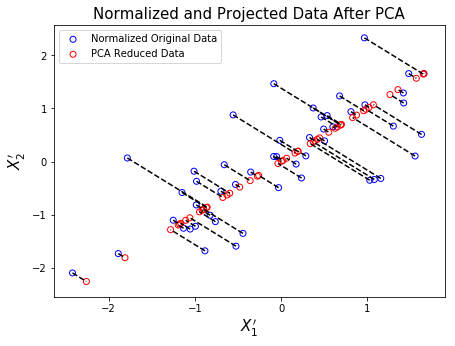

In [17]:
plt.figure(figsize=(7, 5), facecolor='w')

# normalized original data
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b', label='Normalized Original Data')

# PCA reduced data
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r', label='PCA Reduced Data')

# plot the normalized original data projected onto the PCA reduced data
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i, 0], X_rec[i, 0]], [X_norm[i, 1], X_rec[i, 1]], 'k--')
    
plt.title('Normalized and Projected Data After PCA', fontsize=15)
plt.xlabel('$X_{1}^\prime$', fontsize=15)
plt.ylabel('$X_{2}^\prime$', fontsize=15)
plt.legend()

## Face Image Dataset

In [18]:
data_img = io.loadmat('ex7/ex7faces.mat')
type(data_img)

dict

In [19]:
print(data_img.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [20]:
X_img = data_img['X']
print('X_img shape : {}'.format(X_img.shape))

X_img shape : (5000, 1024)


In [21]:
def getData2Img(featureMatrix, n_rows):
    """
    picks the first 100 rows from matrix X_img, each ros is 1*1024, and creat image object (32*32)
    """
    sample_square = []
    for i in range(n_rows):
        sample_square.append(featureMatrix[i, :].reshape(-1, 32).T)
    return (np.array(sample_square))

In [22]:
def displayImg(featureMatrix, rows, cols):
    plt.figure(figsize=(rows, cols), facecolor='w')
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(getData2Img(featureMatrix, n_rows=rows*cols)[i], cmap=plt.cm.Greys_r)
        plt.axis('off')

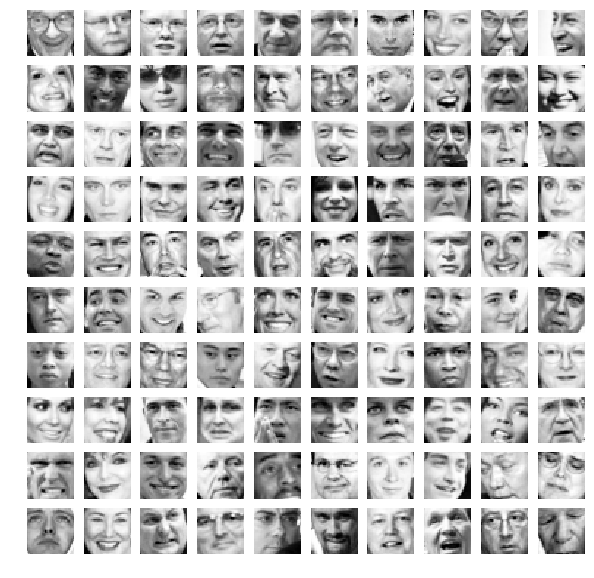

In [23]:
# original faces image
displayImg(X_img, rows=10, cols=10)

#### PCA on Faces

In [24]:
# feature scaling
X_img_norm, X_img_mu, X_img_std = featureScaling(X_img)

# SVD
U_img, S_img, V_img = getUSV(X_img_norm)

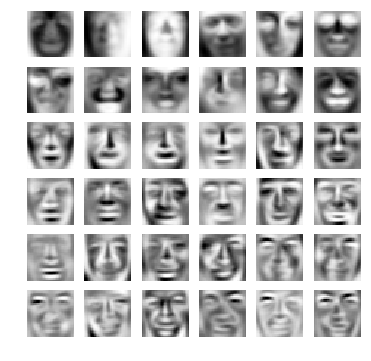

In [25]:
# displays the first 36 principal components (eigenvectors)
displayImg(U_img[:, :36].T, rows=6, cols=6)

#### Dimensionality Reduction

In [26]:
# project each image down to 36 dimensions
z_img = dataProjection(X_img_norm, U_img, K=36)

In [27]:
# recover the normalized original data
X_img_rec = dataRecover(z_img, U_img, K=36)

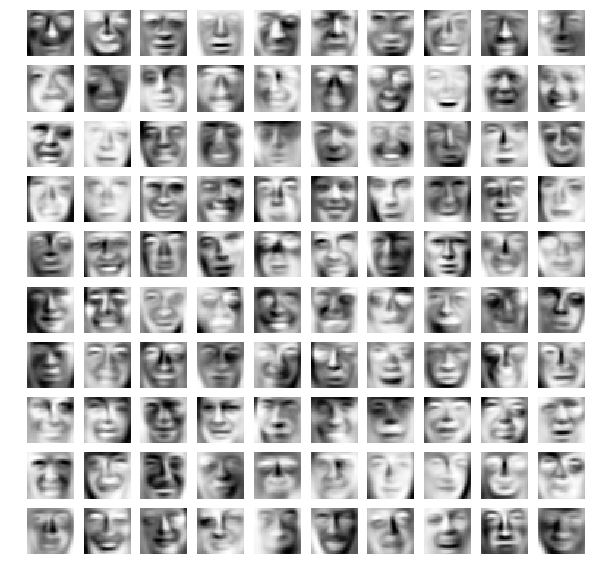

In [28]:
# PCA reduced faces image
displayImg(X_img_rec, rows=10, cols=10)